# Elbow Method for hotspots

### Imports

In [4]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import psycopg2

from config import DB_CONFIG
from preprocess import cleanse

### Load the dataset

In [5]:
conn = psycopg2.connect(**DB_CONFIG)

NUM_OF_VESSELS = 500000

traj_sql = f'''
SELECT timest, dates, mmsi, heading, speed, course, geom FROM vessels_points_jan
WHERE ST_X(ST_Centroid(ST_Transform(geom, 4326))) != 0 
OR ST_Y(ST_Centroid(ST_Transform(geom, 4326))) != 0 LIMIT {NUM_OF_VESSELS};
'''

gdf = gpd.GeoDataFrame.from_postgis(traj_sql, conn, geom_col='geom')

### Cleanse the dataset

In [6]:
gdf = cleanse(gdf)

## Elbow Method

In [7]:
X=np.column_stack((gdf.geom.x, gdf.geom.y))

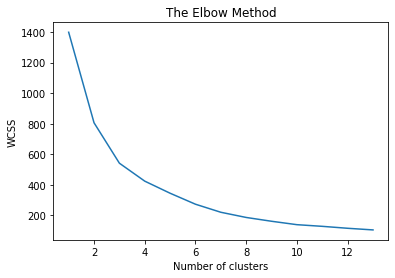

In [8]:
wcss = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 14), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()